In [133]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import pickle
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE

In [134]:
data = pd.read_csv('Dry_Bean_Dataset.csv')
print(data.head())

      Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395.0    610.291       208.178117       173.888747      1.197191   
1  28734.0    638.018       200.524796       182.734419      1.097356   
2  29380.0    624.110       212.826130       175.931143      1.209713   
3  30008.0    645.884       210.557999       182.516516      1.153638   
4  30140.0    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812     28715.0     190.141097  0.763923  0.988856   0.958027   
1      0.411785     29172.0     191.272751  0.783968  0.984986   0.887034   
2      0.562727     29690.0     193.410904  0.778113  0.989559   0.947849   
3      0.498616     30724.0     195.467062  0.782681  0.976696   0.903936   
4      0.333680     30417.0     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358    

In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14291 entries, 0 to 14290
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             14291 non-null  float64
 1   Perimeter        14291 non-null  float64
 2   MajorAxisLength  14291 non-null  float64
 3   MinorAxisLength  14291 non-null  float64
 4   AspectRation     14291 non-null  float64
 5   Eccentricity     14291 non-null  float64
 6   ConvexArea       14291 non-null  float64
 7   EquivDiameter    14291 non-null  float64
 8   Extent           14291 non-null  float64
 9   Solidity         14291 non-null  float64
 10  roundness        14291 non-null  float64
 11  Compactness      14291 non-null  float64
 12  ShapeFactor1     14291 non-null  float64
 13  ShapeFactor2     14291 non-null  float64
 14  ShapeFactor3     14291 non-null  float64
 15  ShapeFactor4     14291 non-null  float64
 16  Class            14291 non-null  object 
dtypes: float64(1

In [136]:
data.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,14291.000000,14291.000000,14291.000000,14291.000000,14291.000000,14291.000000,14291.000000,14291.000000,14291.000000,14291.000000,14291.000000,14291.000000,14291.000000,14291.000000,14291.000000,14291.000000
mean,53012.742812,855.242626,319.937821,202.270738,1.583790,0.751075,53756.112575,253.041519,0.749759,0.987148,0.873140,0.799695,0.006565,0.001714,0.643363,0.995061
std,29430.486000,215.320811,86.145183,45.239872,0.248311,0.092366,29895.847373,59.372108,0.049462,0.004690,0.060122,0.062065,0.001132,0.000599,0.099453,0.004389
min,-15347.466940,344.777598,116.944186,109.701490,0.973648,0.218951,-16838.928170,100.637402,0.544683,0.919246,0.489618,0.609719,0.002541,-0.000046,0.357220,0.947687
25%,36255.000000,703.447500,252.961261,175.491231,1.430541,0.714605,36618.500000,214.882919,0.718622,0.985624,0.831863,0.761916,0.005897,0.001154,0.580703,0.993671
50%,44738.000000,795.880000,297.114110,192.473942,1.551795,0.764568,45297.000000,238.798198,0.759659,0.988280,0.883082,0.801024,0.006648,0.001691,0.641866,0.996367
75%,61518.000000,977.304000,376.495012,217.384935,1.709468,0.810974,62493.500000,279.465830,0.787107,0.990033,0.916982,0.834649,0.007282,0.002170,0.696556,0.997891
max,254616.000000,1985.370000,738.860154,477.334828,2.430306,1.010448,263261.000000,569.374358,0.875673,0.997194,1.022601,0.987303,0.010451,0.003743,0.974767,1.005027


In [137]:
data.value_counts()

Area         Perimeter    MajorAxisLength  MinorAxisLength  AspectRation  Eccentricity  ConvexArea   EquivDiameter  Extent    Solidity  roundness  Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class 
42450.0000   828.116000   347.951525       156.469366       2.223768      0.893186      42820.0000   232.484448     0.609388  0.991359  0.777867   0.668152     0.008197      0.001008      0.446427      0.992750      HOROZ     2
33518.0000   702.956000   277.571399       154.305581       1.798842      0.831240      34023.0000   206.582775     0.808383  0.985157  0.852377   0.744251     0.008281      0.001567      0.553909      0.996396      HOROZ     2
41978.0000   821.864000   337.171464       160.036067       2.106847      0.880178      42593.0000   231.188342     0.684885  0.985561  0.780965   0.685670     0.008032      0.001095      0.470143      0.990520      HOROZ     2
44614.0000   850.425000   351.268986       162.308089       2.164211      0.886848      45243

In [138]:
data.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [139]:
print(data.nunique())

Area               12691
Perimeter          14031
MajorAxisLength    14223
MinorAxisLength    14223
AspectRation       14223
Eccentricity       14223
ConvexArea         12746
EquivDiameter      12691
Extent             14215
Solidity           14202
roundness          14220
Compactness        14223
ShapeFactor1       14201
ShapeFactor2       14185
ShapeFactor3       14223
ShapeFactor4       14211
Class                  8
dtype: int64


In [140]:
# Check for duplicate rows
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

data.drop_duplicates(inplace=True)

Number of duplicate rows: 68


In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14223 entries, 0 to 14290
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             14223 non-null  float64
 1   Perimeter        14223 non-null  float64
 2   MajorAxisLength  14223 non-null  float64
 3   MinorAxisLength  14223 non-null  float64
 4   AspectRation     14223 non-null  float64
 5   Eccentricity     14223 non-null  float64
 6   ConvexArea       14223 non-null  float64
 7   EquivDiameter    14223 non-null  float64
 8   Extent           14223 non-null  float64
 9   Solidity         14223 non-null  float64
 10  roundness        14223 non-null  float64
 11  Compactness      14223 non-null  float64
 12  ShapeFactor1     14223 non-null  float64
 13  ShapeFactor2     14223 non-null  float64
 14  ShapeFactor3     14223 non-null  float64
 15  ShapeFactor4     14223 non-null  float64
 16  Class            14223 non-null  object 
dtypes: float64(16), o

In [142]:
data['Class'].value_counts()

Class
DERMASON    3644
SIRA        2716
SEKER       2117
HOROZ       1934
CALI        1699
BARBUNYA    1418
BOMBAY       621
unknown       74
Name: count, dtype: int64

C:\Users\vansh\AppData\Local\Temp\ipykernel_1856\2632501837.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=data, palette='tab10')


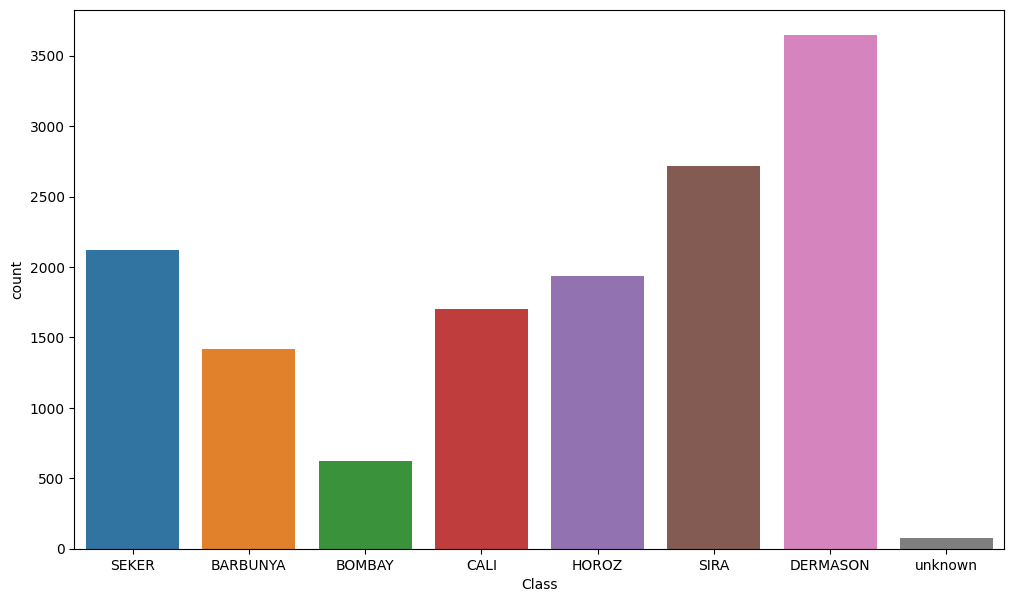

In [143]:
plt.figure(figsize=(12,7))
sns.countplot(x='Class', data=data, palette='tab10')
plt.show()

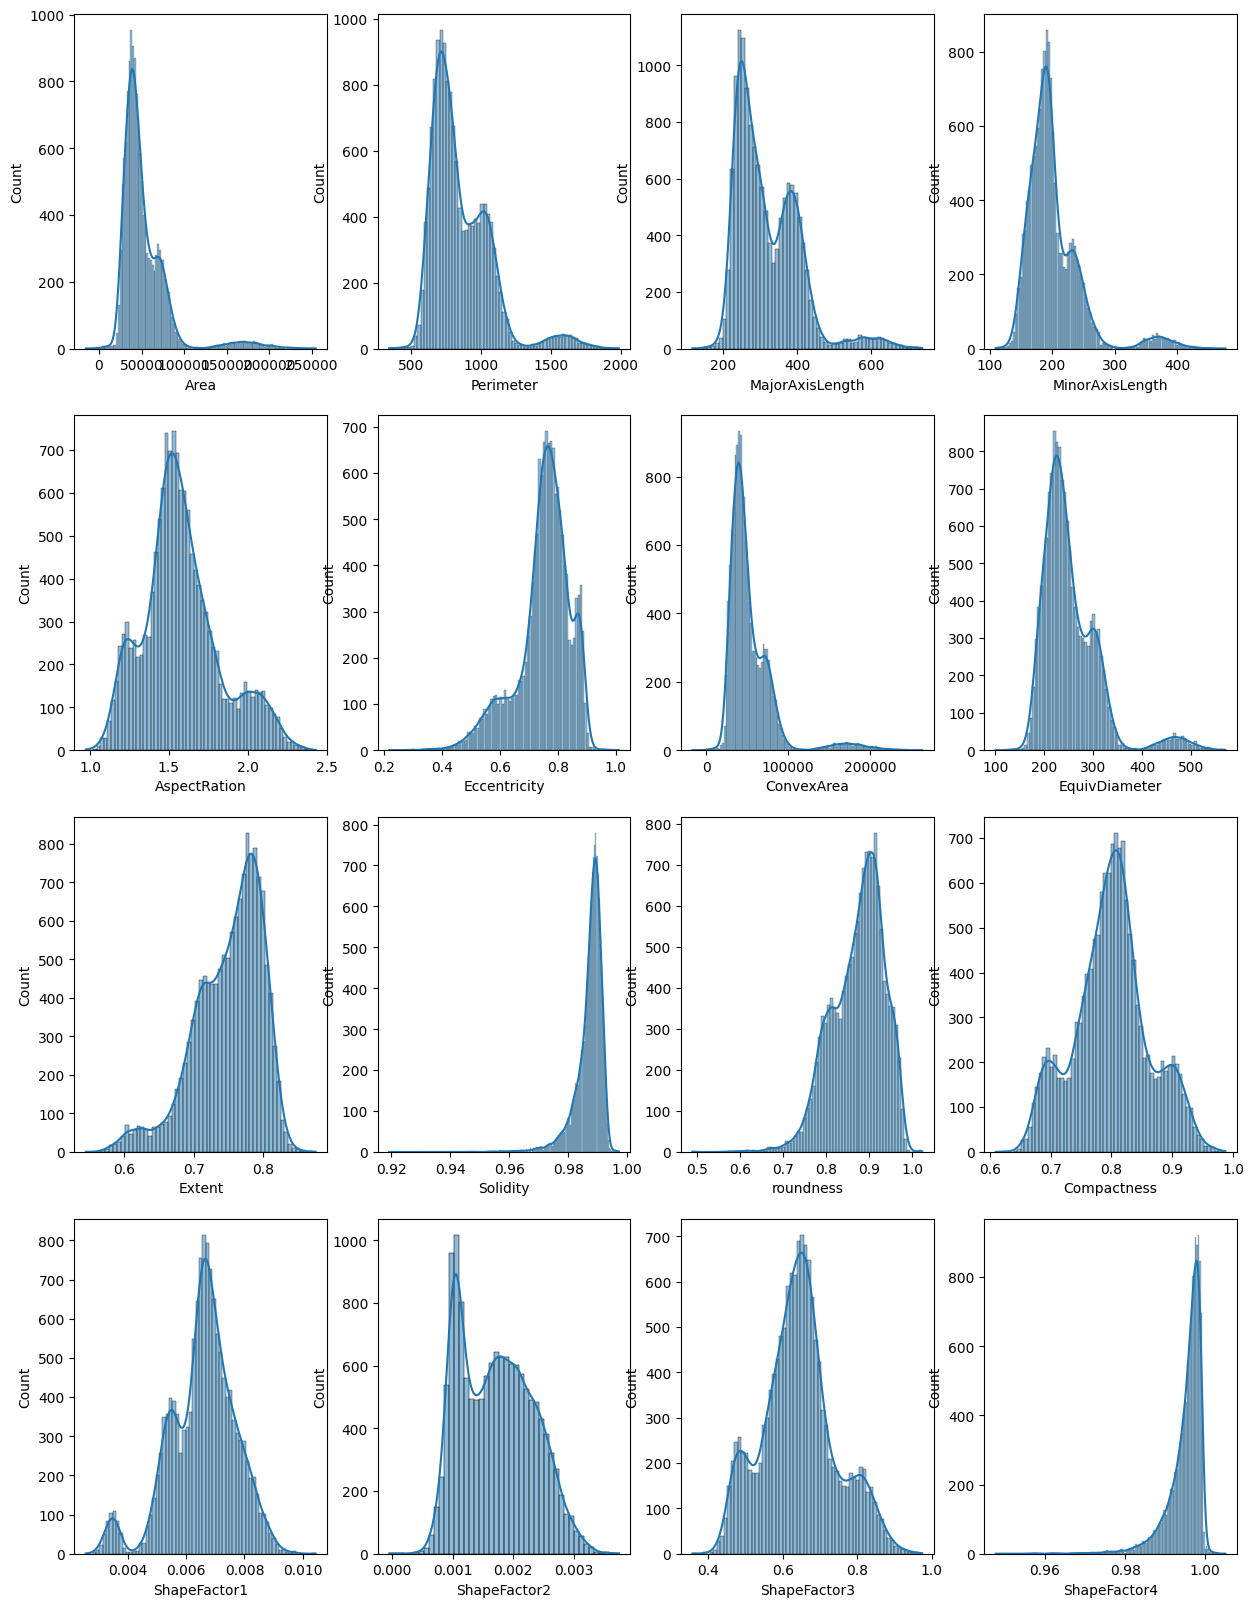

In [144]:
fig,ax=plt.subplots(4,4,figsize=(15,20)) 
ax=ax.flatten()
i=0
for col in data.columns[data.columns!='Class']:
    sns.histplot(data=data,x=col,ax=ax[i],kde=True)
    i+=1

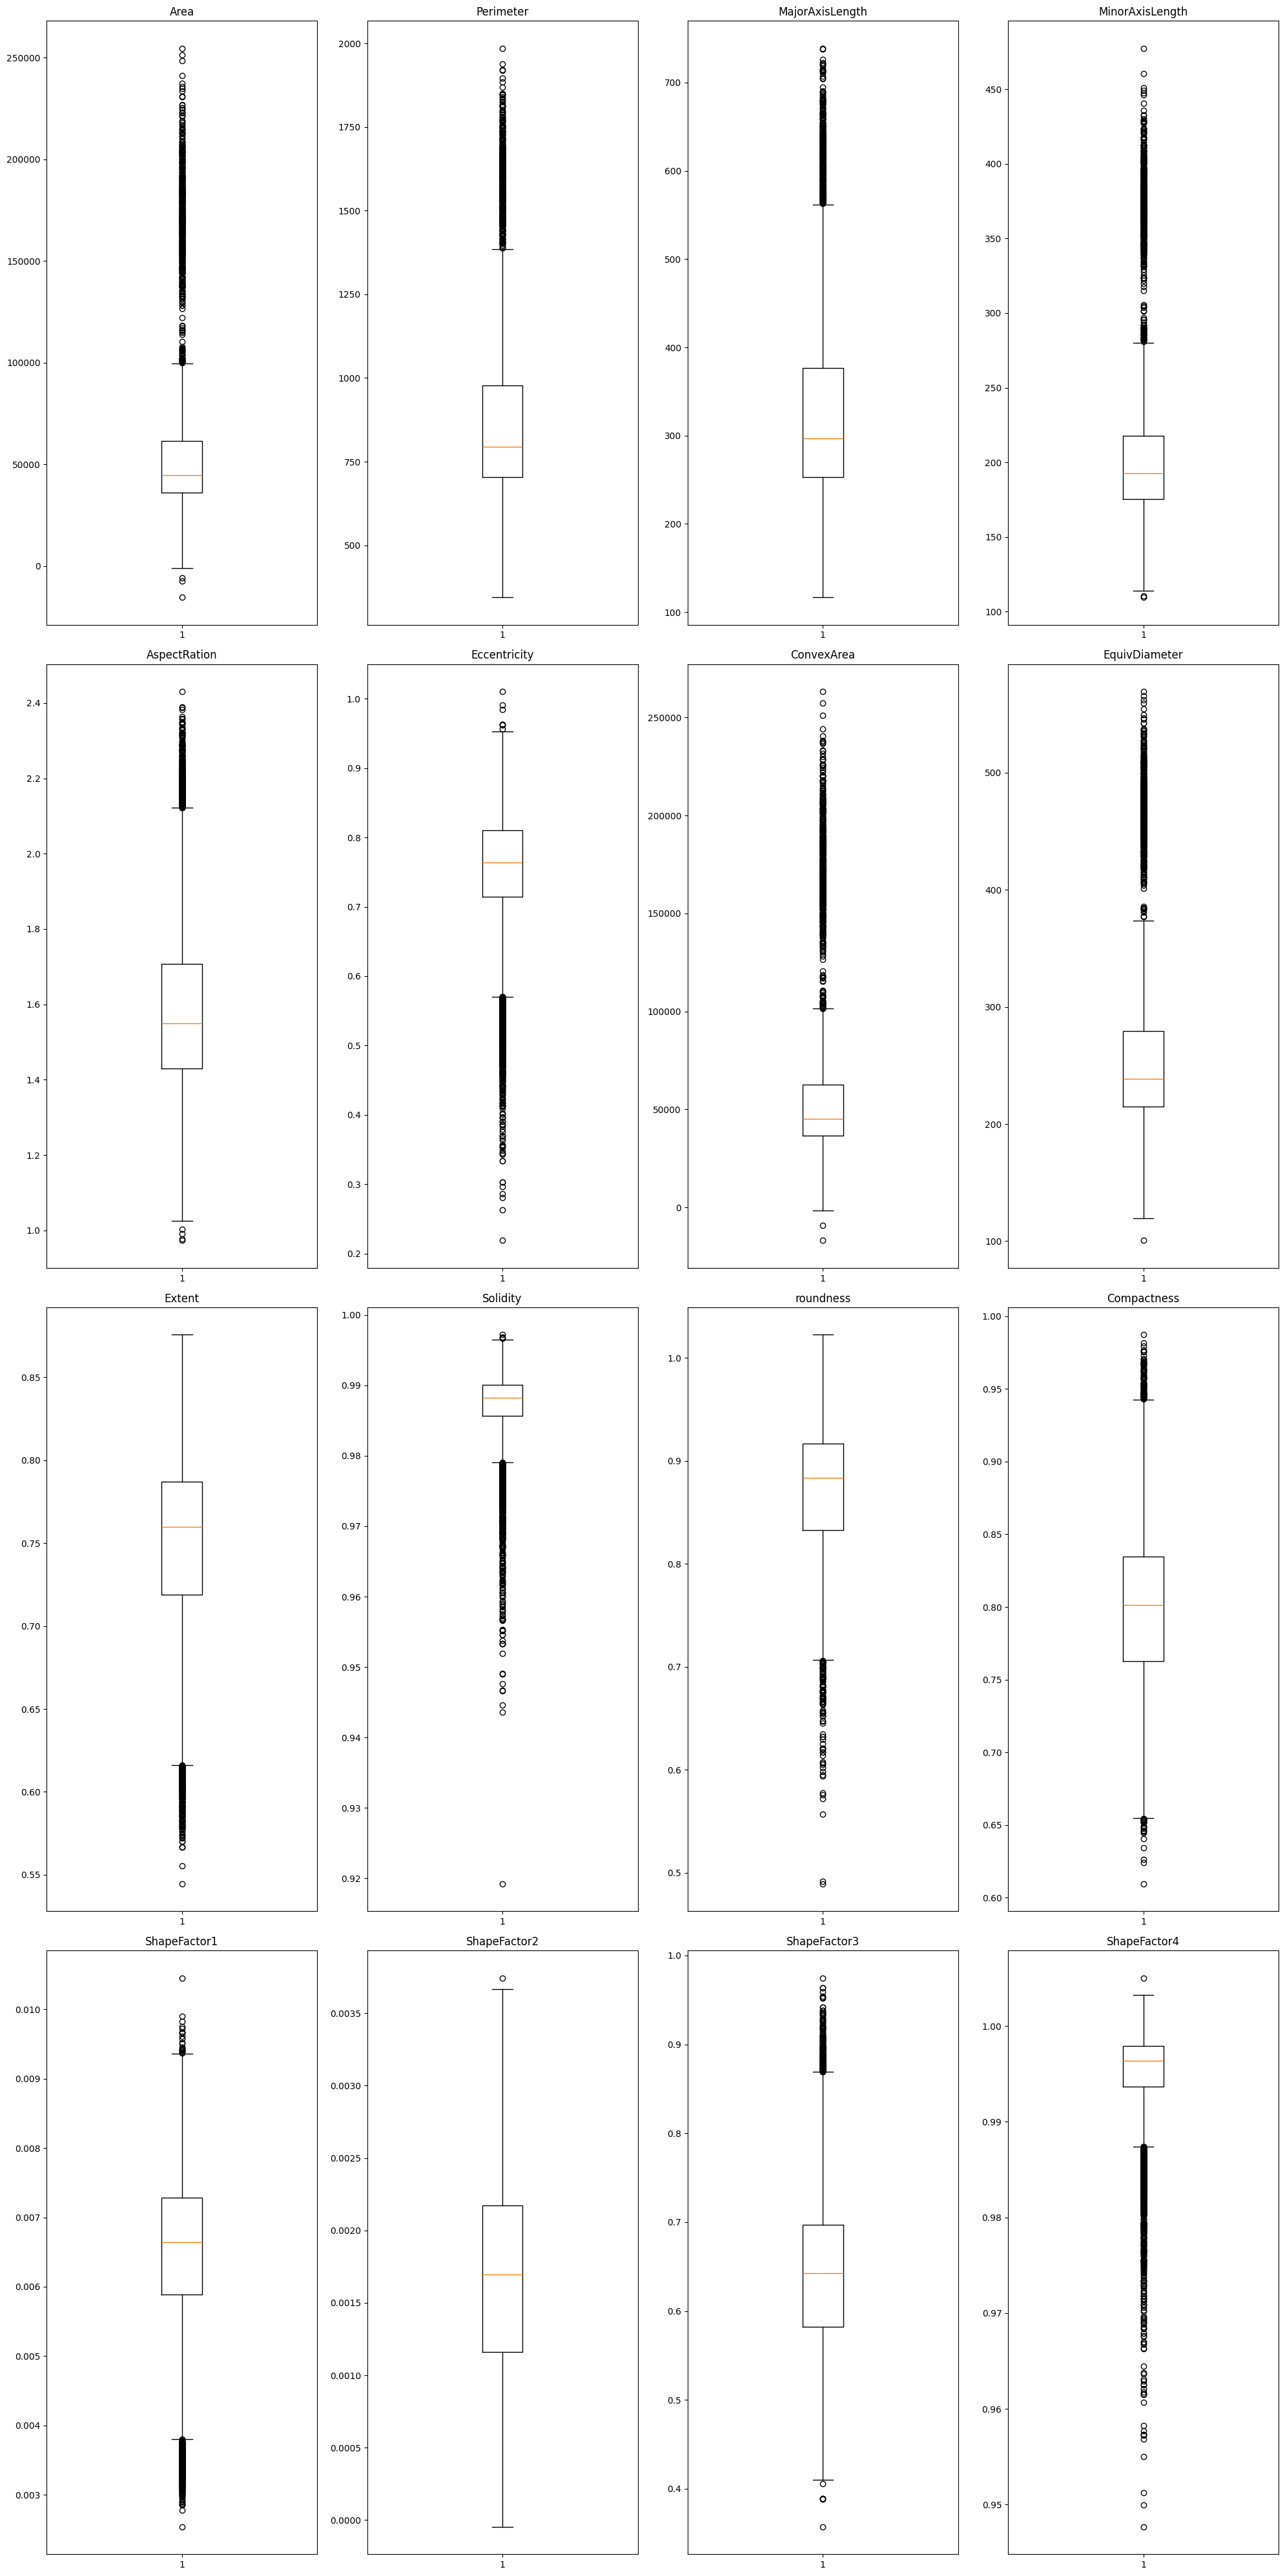

In [145]:
fig, ax = plt.subplots(4, 4, figsize=(20, 40))
ax = ax.flatten()
i = 0
for col in data.columns[data.columns != 'Class']:
    ax[i].boxplot(data[col].dropna())
    ax[i].set_title(col)
    i += 1
plt.tight_layout()
plt.show()

In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14223 entries, 0 to 14290
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             14223 non-null  float64
 1   Perimeter        14223 non-null  float64
 2   MajorAxisLength  14223 non-null  float64
 3   MinorAxisLength  14223 non-null  float64
 4   AspectRation     14223 non-null  float64
 5   Eccentricity     14223 non-null  float64
 6   ConvexArea       14223 non-null  float64
 7   EquivDiameter    14223 non-null  float64
 8   Extent           14223 non-null  float64
 9   Solidity         14223 non-null  float64
 10  roundness        14223 non-null  float64
 11  Compactness      14223 non-null  float64
 12  ShapeFactor1     14223 non-null  float64
 13  ShapeFactor2     14223 non-null  float64
 14  ShapeFactor3     14223 non-null  float64
 15  ShapeFactor4     14223 non-null  float64
 16  Class            14223 non-null  object 
dtypes: float64(16), o

In [147]:
for col in data.columns[data.columns != 'Class']:
    for c in data['Class'].unique():
        subset = data[data['Class'] == c] 
        Q1 = subset[col].quantile(0.25)
        Q3 = subset[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower) & (data[col] <= upper) | (data['Class'] != c)]

data.reset_index(drop=True, inplace=True)


In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11670 entries, 0 to 11669
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             11670 non-null  float64
 1   Perimeter        11670 non-null  float64
 2   MajorAxisLength  11670 non-null  float64
 3   MinorAxisLength  11670 non-null  float64
 4   AspectRation     11670 non-null  float64
 5   Eccentricity     11670 non-null  float64
 6   ConvexArea       11670 non-null  float64
 7   EquivDiameter    11670 non-null  float64
 8   Extent           11670 non-null  float64
 9   Solidity         11670 non-null  float64
 10  roundness        11670 non-null  float64
 11  Compactness      11670 non-null  float64
 12  ShapeFactor1     11670 non-null  float64
 13  ShapeFactor2     11670 non-null  float64
 14  ShapeFactor3     11670 non-null  float64
 15  ShapeFactor4     11670 non-null  float64
 16  Class            11670 non-null  object 
dtypes: float64(1

In [149]:
data['Class'].value_counts()

Class
DERMASON    3110
SIRA        2318
SEKER       1656
HOROZ       1485
CALI        1443
BARBUNYA    1148
BOMBAY       459
unknown       51
Name: count, dtype: int64

In [150]:
# Drop all rows where the class is 'unknown'
data = data[data['Class'] != 'unknown']
data.reset_index(drop=True, inplace=True)

In [151]:
x=data.drop(columns='Class')
y=data['Class']

In [152]:

# bean_labels = {'DERMASON':0, 'SIRA':1, 'SEKER':2, 'HOROZ':3, 'CALI':4, 'BARBUNYA':5, 'BOMBAY':6}
# data['Class'] = data['Class'].replace(bean_labels)

labelencoder = LabelEncoder()

y = pd.DataFrame(
    labelencoder.fit_transform(y)
)


for class_label, encoded_value in zip(labelencoder.classes_, range(len(labelencoder.classes_))):
    print(f"{class_label} → {encoded_value}")


BARBUNYA → 0
BOMBAY → 1
CALI → 2
DERMASON → 3
HOROZ → 4
SEKER → 5
SIRA → 6


In [153]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, stratify=y )

In [154]:
y_train

,0
4438,2
7190,6
8859,3
9866,3
9834,3
...,...
2371,0
756,5
3475,2
3811,2


In [155]:
scaler=StandardScaler()
feature_names = X_train.columns  

X_train = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns=feature_names
)
X_test = X_test = pd.DataFrame(
    scaler.transform(X_test),
    columns=feature_names
)

In [156]:
X_train

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,1.018002,1.196501,1.388644,0.879666,0.967516,0.934170,1.011392,1.209206,0.563170,0.404895,-0.570625,-1.001222,-1.124507,-1.247722,-0.999117,-0.489751
1,-0.318303,-0.329889,-0.372737,-0.156590,-0.437647,-0.180966,-0.315672,-0.288033,0.876274,-0.583079,0.356718,0.317453,0.022499,0.191134,0.283534,-1.550460
2,-0.903286,-1.100915,-0.980475,-1.295922,0.226879,0.450228,-0.903758,-1.161855,0.374426,0.323029,0.033109,-0.320572,2.045370,0.526044,-0.353388,0.753589
3,-0.745393,-0.895209,-0.863538,-0.882383,-0.287142,-0.015724,-0.743488,-0.903665,-1.220668,-0.431748,0.368727,0.181804,1.167181,0.647031,0.145558,-0.192001
4,-0.749669,-0.930018,-0.942052,-0.807224,-0.580241,-0.352692,-0.749425,-0.910396,-0.166491,0.015021,0.666353,0.531395,1.002605,0.938882,0.503958,0.821059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8128,0.664728,1.013210,0.713722,0.919272,-0.066191,0.201315,0.671757,0.855981,-0.721817,-1.047850,-1.451731,-0.051600,-1.162492,-0.689466,-0.088613,-0.261958
8129,-0.502979,-0.655667,-0.828967,-0.130304,-1.294074,-1.530868,-0.506911,-0.541782,0.398135,0.838743,1.253542,1.446501,-0.060372,1.295867,1.485635,1.008531
8130,0.486586,0.712900,0.903480,0.313073,1.054004,0.980297,0.476268,0.668315,1.170806,1.074333,-0.742690,-1.054931,-0.582378,-1.090492,-1.048588,0.357071
8131,0.662265,0.944546,1.247235,0.338050,1.573339,1.223213,0.651787,0.853433,1.034191,0.982858,-1.073521,-1.471222,-0.593246,-1.328865,-1.424672,-0.614827


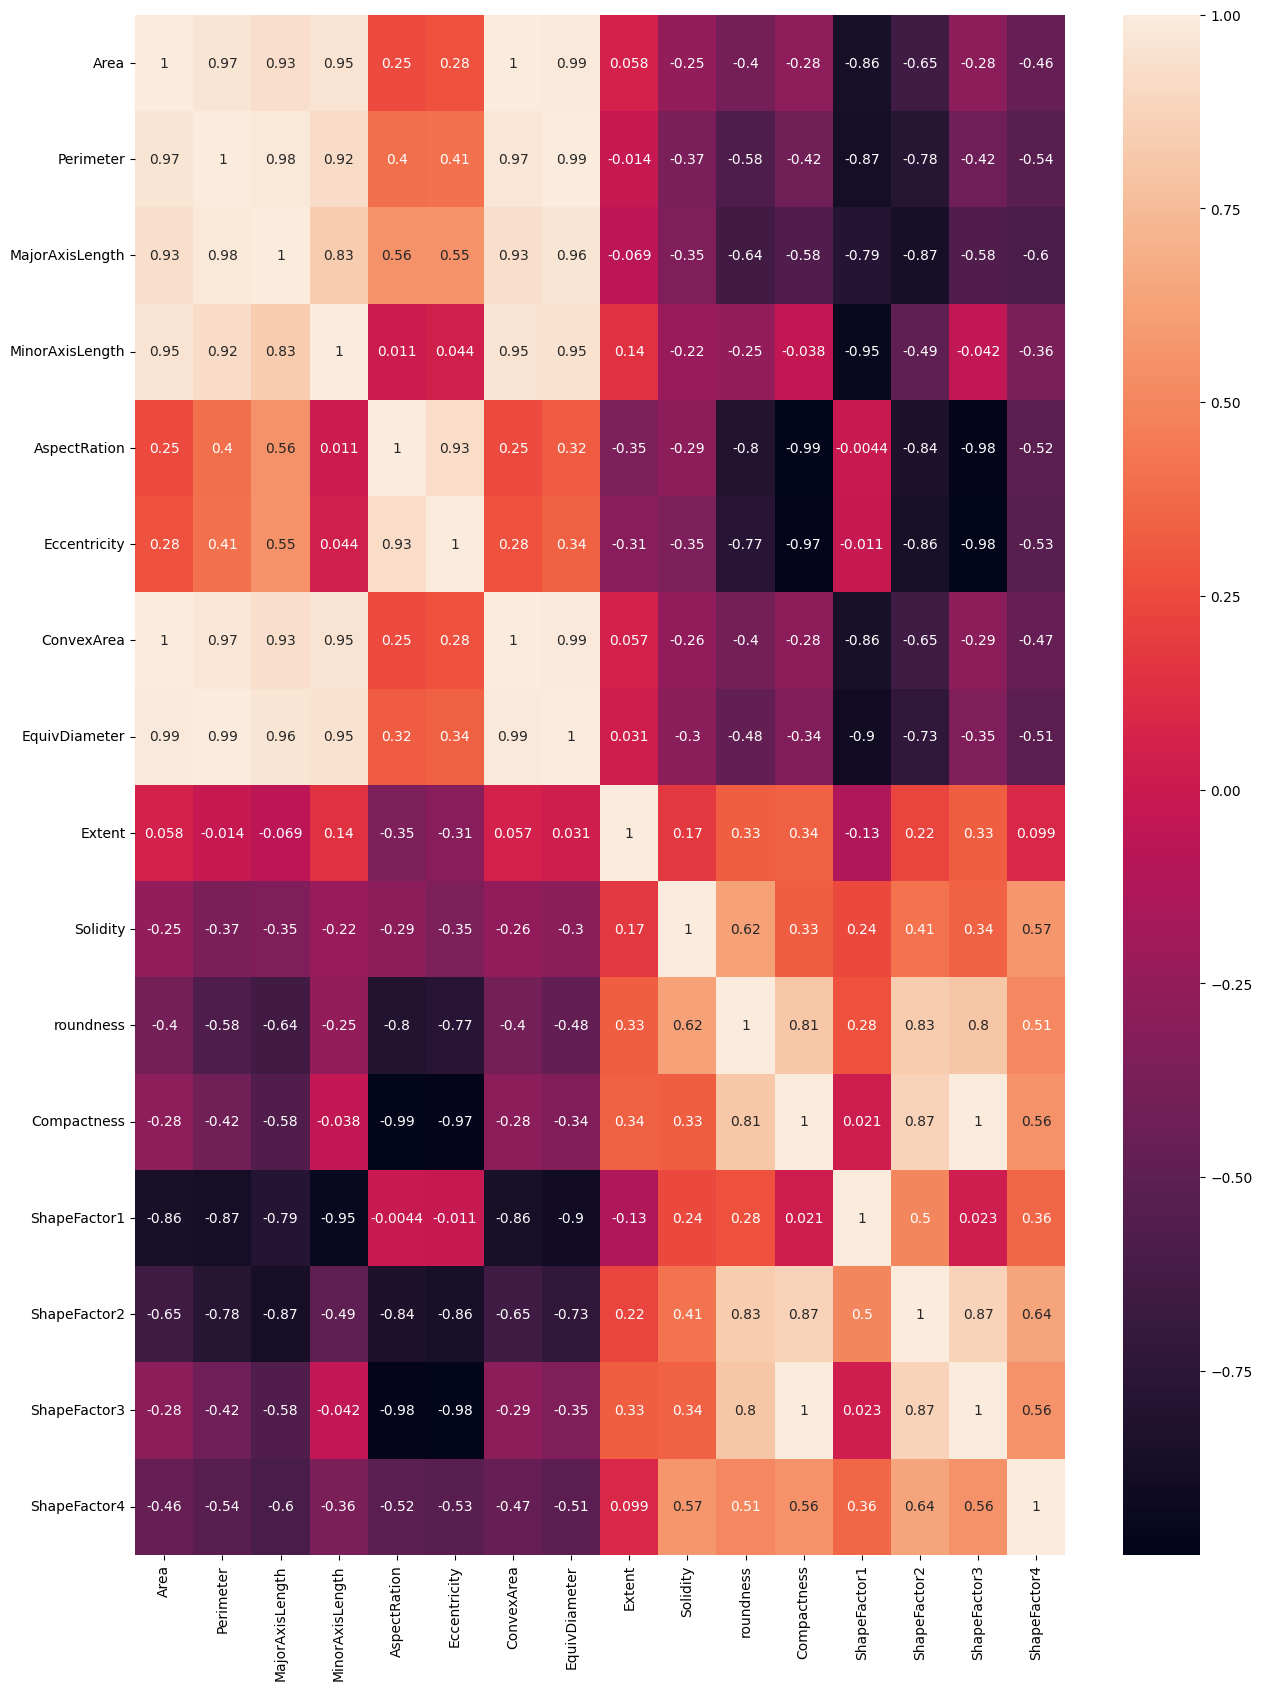

In [157]:
plt.figure(figsize=(15, 20))
sns.heatmap(X_train.corr(), annot=True)
plt.show()

In [158]:
smote = SMOTE() 
X_train_new, y_train_new = smote.fit_resample(X_train, y_train)  # Resampling

In [159]:
y_train_new.value_counts()

0
0    2177
1    2177
2    2177
3    2177
4    2177
5    2177
6    2177
Name: count, dtype: int64

In [160]:
zid = 5608613
n_neighbors_default = (zid % 5) + 2
print(f"ZID: z{zid}")
print(f"Default n_neighbors = {n_neighbors_default}")

ZID: z5608613
Default n_neighbors = 5


In [161]:
knn_classifier = KNeighborsClassifier(n_neighbors=n_neighbors_default)
knn_classifier.fit(X_train_new, y_train_new)

c:\Users\vansh\anaconda3\envs\pop\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [162]:
scores=cross_val_score(knn_classifier,X_train_new,y_train_new)
print(scores)
print(np.mean(scores)*100)

c:\Users\vansh\anaconda3\envs\pop\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\vansh\anaconda3\envs\pop\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\vansh\anaconda3\envs\pop\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\vansh\anaconda3\envs\pop\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

[0.95964567 0.96555118 0.9691601  0.97047244 0.97965212]
96.88963026323384


c:\Users\vansh\anaconda3\envs\pop\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


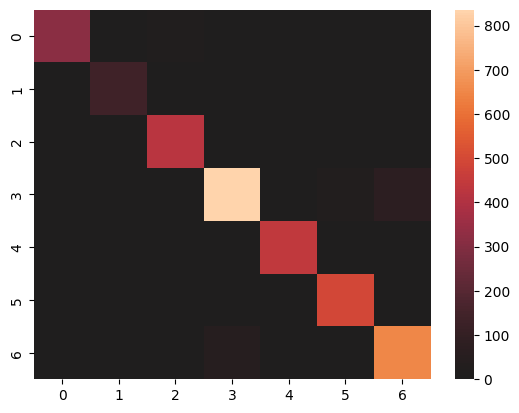

Confusion Matrix is
 [[318   0  19   0   0   0   7]
 [  0 138   0   0   0   0   0]
 [  9   0 424   0   0   0   0]
 [  0   0   0 836   0  23  74]
 [  1   0   6   0 439   0   0]
 [  0   0   0   2   0 492   3]
 [  0   0   0  44   1   3 647]]


In [163]:
y_pred = knn_classifier.predict(X_test)
CM_RF = confusion_matrix(y_test, y_pred)

sns.heatmap(CM_RF, center=True)
plt.show()

print('Confusion Matrix is\n', CM_RF)

In [164]:
print('knn_classifier Train Score is : ' , knn_classifier.score(X_train_new, y_train_new))
print('knn_classifier Test Score is : ' , knn_classifier.score(X_test, y_test))

knn_classifier Train Score is :  0.9803136688759105
knn_classifier Test Score is :  0.9449225473321858


In [165]:
print('Accuracy: %.5f' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=np.unique(labelencoder.inverse_transform(y))))


Accuracy: 0.94492
              precision    recall  f1-score   support

    BARBUNYA       0.97      0.92      0.95       344
      BOMBAY       1.00      1.00      1.00       138
        CALI       0.94      0.98      0.96       433
    DERMASON       0.95      0.90      0.92       933
       HOROZ       1.00      0.98      0.99       446
       SEKER       0.95      0.99      0.97       497
        SIRA       0.89      0.93      0.91       695

    accuracy                           0.94      3486
   macro avg       0.96      0.96      0.96      3486
weighted avg       0.95      0.94      0.94      3486



c:\Users\vansh\anaconda3\envs\pop\lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [166]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_neighbors': [ 5, 6, 7, 8, 9, 10, 11, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree']
}

# Perform grid search
grid_search = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train_new, y_train_new)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_:.4f}")


y_pred_1 = grid_search.predict(X_test)
print('knn_classifier_1 Accuracy: %.5f' % accuracy_score(y_test, y_pred_1))

print('knn_classifier_1 Train Score is : ' , grid_search.score(X_train_new, y_train_new))
print('knn_classifier_1 Test Score is : ' , grid_search.score(X_test, y_test))
print(classification_report(y_test, y_pred_1, target_names=np.unique(labelencoder.inverse_transform(y))))



c:\Users\vansh\anaconda3\envs\pop\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Best parameters: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'distance'}
Best score: 0.9753
knn_classifier_1 Accuracy: 0.94435
knn_classifier_1 Train Score is :  1.0
knn_classifier_1 Test Score is :  0.9443488238668961
              precision    recall  f1-score   support

    BARBUNYA       0.97      0.92      0.95       344
      BOMBAY       1.00      1.00      1.00       138
        CALI       0.95      0.98      0.96       433
    DERMASON       0.95      0.89      0.92       933
       HOROZ       0.99      0.98      0.99       446
       SEKER       0.95      0.99      0.97       497
        SIRA       0.88      0.93      0.91       695

    accuracy                           0.94      3486
   macro avg       0.96      0.96      0.96      3486
weighted avg       0.95      0.94      0.94      3486



c:\Users\vansh\anaconda3\envs\pop\lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


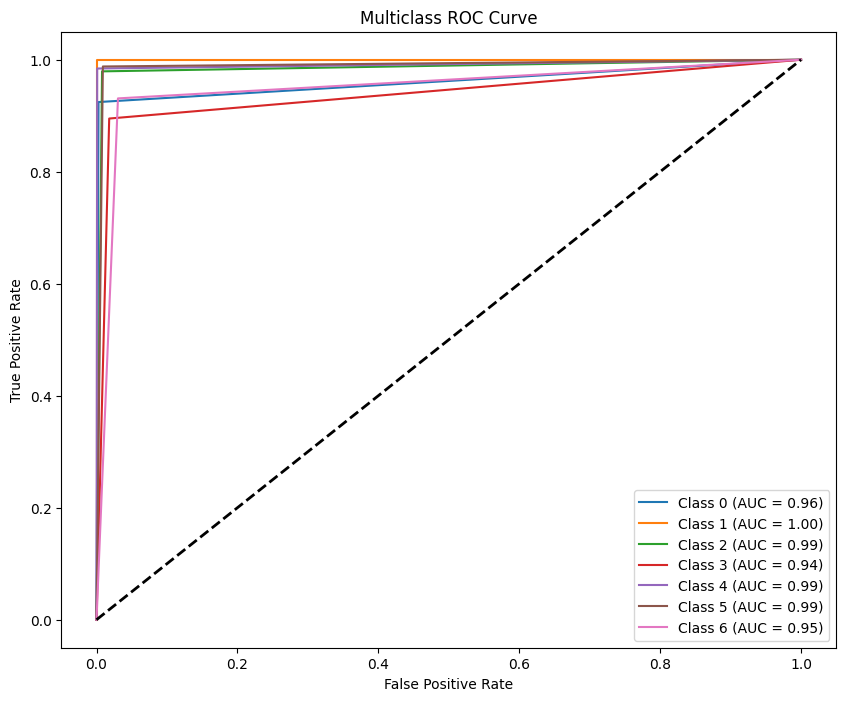

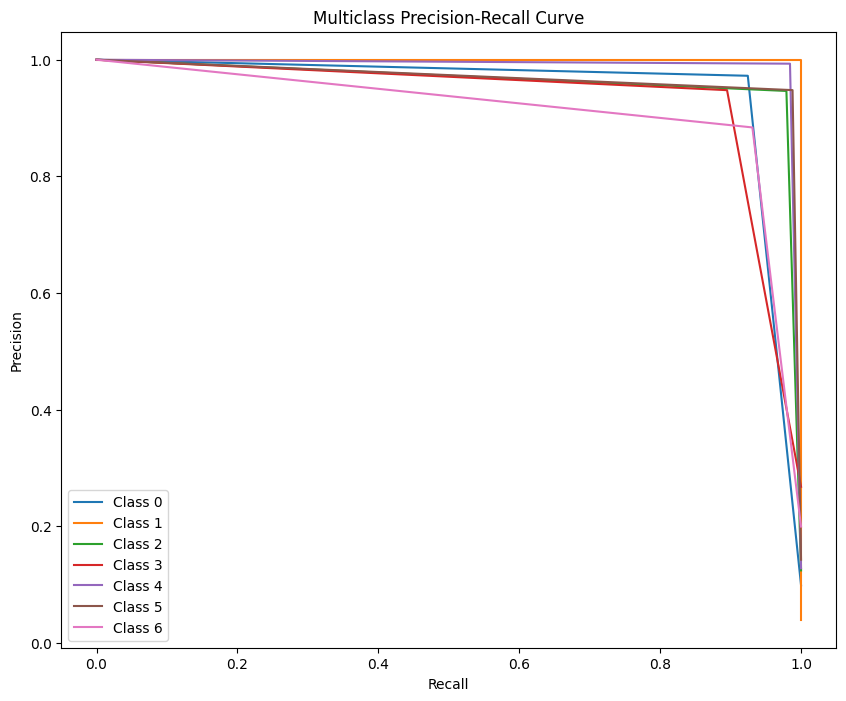

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics        import roc_curve, auc, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay

# Binarize the output for multiclass ROC
n_classes = len(np.unique(y_test))
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_pred_bin = label_binarize(y_pred_1, classes=np.unique(y_test))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for all classes
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_pred_bin[:, i])
    plt.plot(recall, precision, label=f'Class {i}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Multiclass Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

In [36]:
# Save model
with open(r'models/knn_classifier.pkl', 'wb') as file:
    pickle.dump(grid_search, file)
    
    
# # Load model
# with open(r'models/knn_classifier.pkl', 'rb') as file:
#     loaded_knn = pickle.load(file)
    
    
# Save model
with open(r'models/knn_model_grid_search.pkl', 'wb') as file:
    pickle.dump(grid_search, file)
    
    
# # Load model
# with open(r'models/knn_model_grid_search.pkl', 'rb') as file:
#     loaded_knn = pickle.load(file)